<a href="https://www.kaggle.com/code/sharanharsoor/pytorch-cnn-step-by-step?scriptVersionId=127779697" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introduction. 

In this notebook, will see step by step guide to build CNN based models using PyTorch. 

* Loading dataset (CIFAR10)
* `Dataloader` in `torch.utils`
* Visualising images
* Single and multiple convolutional layers
* LeNet
* Training LeNet
* Training on GPU
* visualisation using GPU for Kernels. <br>
Most of the concepts explained in this Notebook are learnt from course [Deep Learning](https://padhai.onefourthlabs.in/courses/dl-feb-2019) <br>

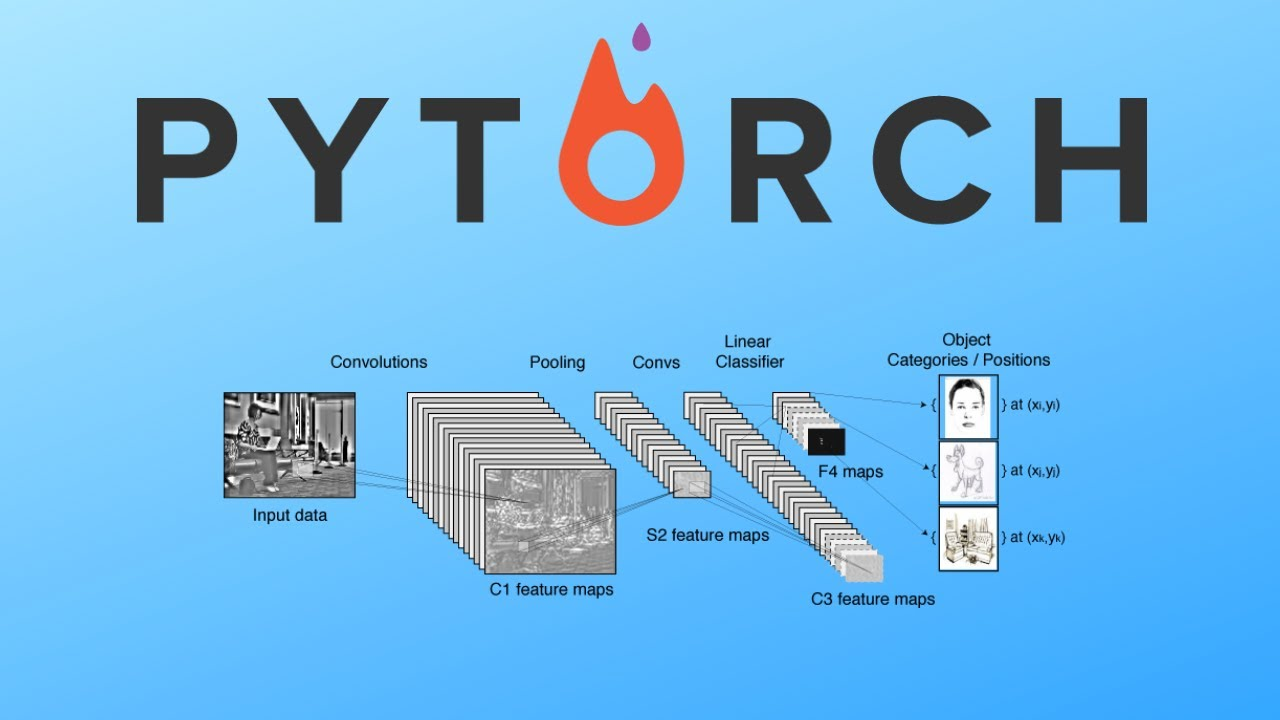 <br>
[image](https://www.youtube.com/watch?v=wnK3uWv_WkU) <br> 

# Data loading

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import torchvision
import torchvision.transforms as transforms
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, 
                                        download=True, 
                                        transform=transforms.ToTensor())

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data


In [3]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [4]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True)

In [5]:
dataiter = iter(trainloader)
images, labels = next(dataiter)

print(images.shape)
print(images[1].shape)
print(labels[1].item())

torch.Size([4, 3, 32, 32])
torch.Size([3, 32, 32])
5


# Visualising images

In [6]:
img = images[1]
print(type(img))

<class 'torch.Tensor'>


In [7]:
npimg = img.numpy()
print(npimg.shape)

(3, 32, 32)


In [8]:
npimg = np.transpose(npimg, (1, 2, 0))
print(npimg.shape)

(32, 32, 3)


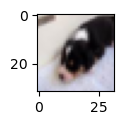

In [9]:
plt.figure(figsize = (1,1))
plt.imshow(npimg)
plt.show()

In [10]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

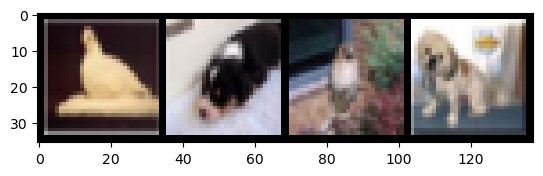

bird dog bird dog


In [11]:
imshow(torchvision.utils.make_grid(images))
print(' '.join(classes[labels[j]] for j in range(4)))

# Single and multiple convolutional layers

In [12]:
import torch.nn as nn

class FirstCNN(nn.Module):
    def __init__(self): 
        super(FirstCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=(1,1), stride=(2,2)) 
        # 3 (number of channels RGB), 16 (number of output channels), 3 (kernel size),   padding=(1,1), stride=(2,2))
        
    def forward(self, x):
        x = self.conv1(x)
        return x

In [13]:
net = FirstCNN()

In [14]:
out = net(images)
out.shape # 4 (batch size), 16 (kernels), 16 (x image size), 16 (y image size)

torch.Size([4, 16, 16, 16])

In [15]:
for param in net.parameters():
    print(param.shape)

torch.Size([16, 3, 3, 3])
torch.Size([16])


torch.Size([16, 3, 3, 3]) <- 16 kernels, 3 channel depth, 3 kernel size, 3 kernel size <br>
torch.Size([16]) <- 16 bias terms (each kernel has 1 bias terms) <br>

In [16]:
out1 = out[0, 0, :, :].detach().numpy()
print(out1.shape)

(16, 16)


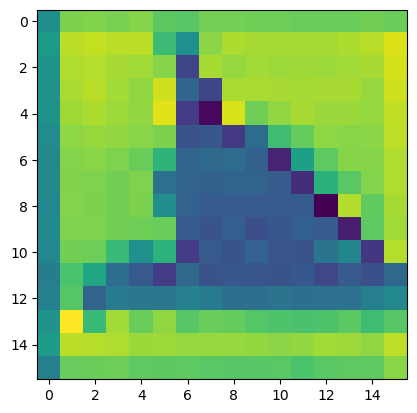

In [17]:
plt.imshow(out[0, 0, :, :].detach().numpy())
plt.show()

# Deep Convolutional Network

In [18]:
class FirstCNN_v2(nn.Module):
    def __init__(self): 
        super(FirstCNN_v2, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 8, 3),   # (N, 3, 32, 32) -> (N, 8, 30, 30)
            nn.Conv2d(8, 16, 3)   # (N, 8, 30, 30) -> (N, 16, 28, 28)
        )
        
    def forward(self, x):
        x = self.model(x)
        return x

In [19]:
net = FirstCNN_v2()
out = net(images)
out.shape

torch.Size([4, 16, 28, 28])

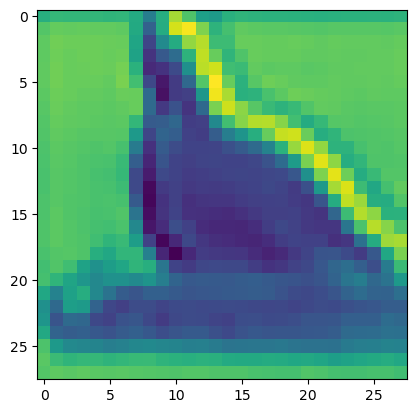

In [20]:
plt.imshow(out[0, 0, :, :].detach().numpy())

In [21]:
class FirstCNN_v3(nn.Module):
    def __init__(self): 
        super(FirstCNN_v3, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 6, 5),          # (N, 3, 32, 32) -> (N, 6, 28, 28)
            nn.AvgPool2d(2, stride=2),   # (N, 6, 28, 28) -> (N, 6, 14, 14)
            nn.Conv2d(6, 16, 5),         # (N, 6, 14, 14) -> (N, 16, 10, 10)
            nn.AvgPool2d(2, stride=2)    # (N, 16, 10, 10) -> (N, 16, 5, 5)
        )
        
    def forward(self, x):
        x = self.model(x)
        return x

In [22]:
net = FirstCNN_v3()
out = net(images)
out.shape

torch.Size([4, 16, 5, 5])

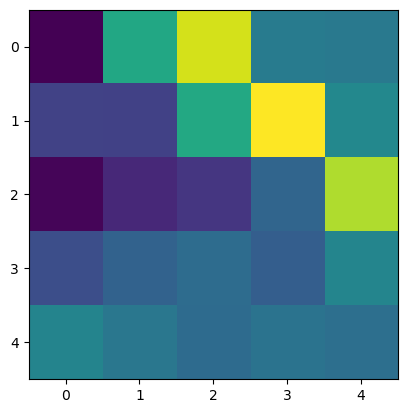

In [23]:
plt.imshow(out[0, 0, :, :].detach().numpy())

# LeNet <br>
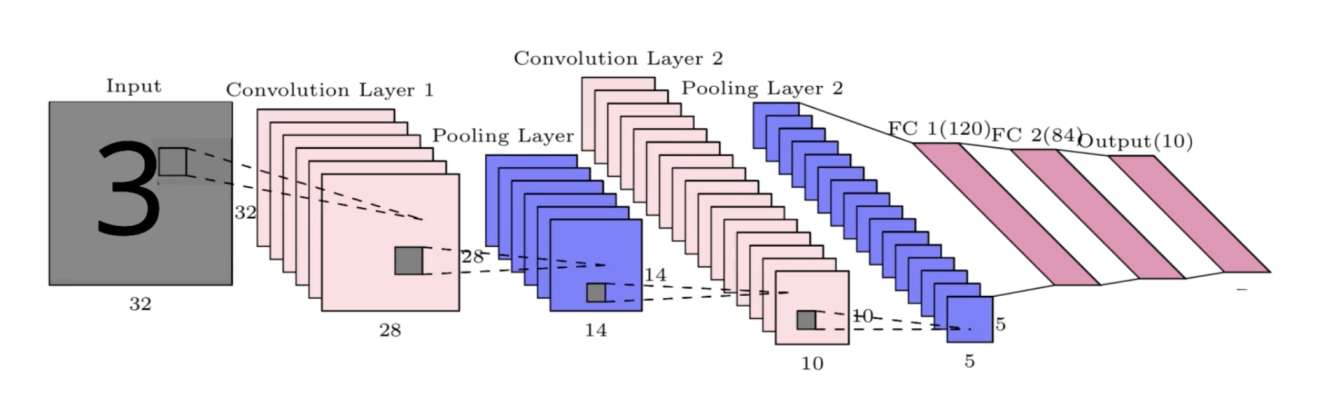 <br>

In [24]:
class LeNet(nn.Module):
    def __init__(self): 
        super(LeNet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(3, 6, 5),         # (N, 3, 32, 32) -> (N,  6, 28, 28)
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2),  # (N, 6, 28, 28) -> (N,  6, 14, 14)
            nn.Conv2d(6, 16, 5),        # (N, 6, 14, 14) -> (N, 16, 10, 10)  
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2)   # (N,16, 10, 10) -> (N, 16, 5, 5)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(400,120),         # (N, 400) -> (N, 120)
            nn.Tanh(),
            nn.Linear(120,84),          # (N, 120) -> (N, 84)
            nn.Tanh(),
            nn.Linear(84,10)            # (N, 84)  -> (N, 10)
        )
        
    def forward(self, x):
        print(x.shape)
        x = self.cnn_model(x)
        print(x.shape)
        x = x.view(x.size(0), -1)
        print(x.shape)
        x = self.fc_model(x)
        print(x.shape)
        return x

In [25]:
net = LeNet()
out = net(images)

torch.Size([4, 3, 32, 32])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 10])


In [26]:
print(out)

tensor([[-0.0261, -0.1278,  0.0323, -0.0479, -0.0582, -0.0089, -0.0061,  0.0178,
         -0.0662, -0.0615],
        [-0.0462, -0.1164, -0.0208, -0.1102, -0.0266,  0.0189, -0.0303,  0.0154,
         -0.0503, -0.0513],
        [-0.0417, -0.1309,  0.0146, -0.0664, -0.0568,  0.0088, -0.0117,  0.0345,
         -0.0571, -0.0666],
        [-0.0130, -0.1369,  0.0031, -0.0963, -0.0375,  0.0157,  0.0062,  0.0453,
         -0.0601, -0.0722]], grad_fn=<AddmmBackward0>)


In [27]:
max_values, pred_class = torch.max(out.data, 1)
print(pred_class)

tensor([2, 5, 7, 7])


# Training LeNet

In [28]:
class LeNet(nn.Module):
    def __init__(self): 
        super(LeNet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(3, 6, 5),         # (N, 3, 32, 32) -> (N,  6, 28, 28)
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2),  # (N, 6, 28, 28) -> (N,  6, 14, 14)
            nn.Conv2d(6, 16, 5),        # (N, 6, 14, 14) -> (N, 16, 10, 10)  
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2)   # (N,16, 10, 10) -> (N, 16, 5, 5)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(400,120),         # (N, 400) -> (N, 120)
            nn.Tanh(),
            nn.Linear(120,84),          # (N, 120) -> (N, 84)
            nn.Tanh(),
            nn.Linear(84,10)            # (N, 84)  -> (N, 10)
        )
        
    def forward(self, x):
        x = self.cnn_model(x)
        x = x.view(x.size(0), -1)
        x = self.fc_model(x)
        return x

In [29]:
batch_size = 128
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [30]:
def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        outputs = net(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [31]:
net = LeNet()

In [32]:
import torch.optim as optim

loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

Epoch: 0/16, Test acc: 38.34, Train acc: 38.66
Epoch: 1/16, Test acc: 43.71, Train acc: 43.82
Epoch: 2/16, Test acc: 47.13, Train acc: 47.83
Epoch: 3/16, Test acc: 49.01, Train acc: 50.10
Epoch: 4/16, Test acc: 50.90, Train acc: 52.97
Epoch: 5/16, Test acc: 51.90, Train acc: 55.17
Epoch: 6/16, Test acc: 53.06, Train acc: 56.21
Epoch: 7/16, Test acc: 52.44, Train acc: 56.19
Epoch: 8/16, Test acc: 54.38, Train acc: 59.23
Epoch: 9/16, Test acc: 54.64, Train acc: 59.80
Epoch: 10/16, Test acc: 55.13, Train acc: 61.30
Epoch: 11/16, Test acc: 55.41, Train acc: 61.73
Epoch: 12/16, Test acc: 55.28, Train acc: 62.07
Epoch: 13/16, Test acc: 55.01, Train acc: 62.92
Epoch: 14/16, Test acc: 55.98, Train acc: 64.68
Epoch: 15/16, Test acc: 56.05, Train acc: 65.71


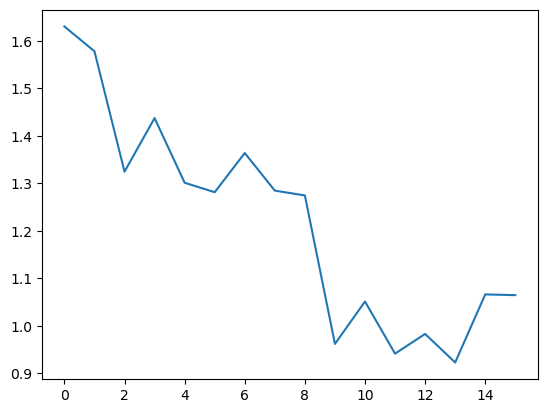

CPU times: user 6min 31s, sys: 392 ms, total: 6min 32s
Wall time: 6min 33s


In [33]:
%%time
loss_arr = []
loss_epoch_arr = []
max_epochs = 16

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data

        opt.zero_grad()

        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
        loss_arr.append(loss.item())
        
    loss_epoch_arr.append(loss.item())
        
    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (epoch, max_epochs, evaluation(testloader), evaluation(trainloader)))
    
    
plt.plot(loss_epoch_arr)
plt.show()

# Train on GPU

In [34]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [35]:
def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [36]:
net = LeNet().to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

Epoch: 0/16, Test acc: 38.99, Train acc: 38.95
Epoch: 1/16, Test acc: 43.36, Train acc: 43.30
Epoch: 2/16, Test acc: 46.81, Train acc: 47.95
Epoch: 3/16, Test acc: 48.89, Train acc: 50.09
Epoch: 4/16, Test acc: 50.56, Train acc: 53.14
Epoch: 5/16, Test acc: 52.78, Train acc: 55.72
Epoch: 6/16, Test acc: 52.70, Train acc: 56.23
Epoch: 7/16, Test acc: 53.79, Train acc: 57.99
Epoch: 8/16, Test acc: 54.33, Train acc: 58.84
Epoch: 9/16, Test acc: 54.35, Train acc: 59.99
Epoch: 10/16, Test acc: 55.46, Train acc: 61.50
Epoch: 11/16, Test acc: 54.40, Train acc: 61.95
Epoch: 12/16, Test acc: 55.75, Train acc: 63.16
Epoch: 13/16, Test acc: 55.84, Train acc: 64.24
Epoch: 14/16, Test acc: 55.86, Train acc: 64.51
Epoch: 15/16, Test acc: 55.84, Train acc: 65.51


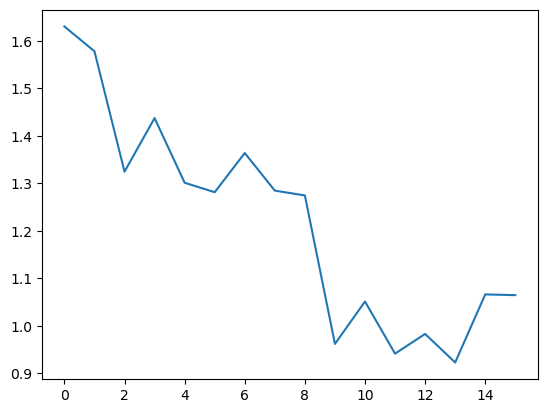

CPU times: user 3min 46s, sys: 974 ms, total: 3min 47s
Wall time: 3min 50s


In [37]:
%%time
max_epochs = 16

for epoch in range(max_epochs):
    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
       
    #print('Epoch: %d/%d' % (epoch, max_epochs))
    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (epoch, max_epochs, evaluation(testloader), evaluation(trainloader)))
    
plt.plot(loss_epoch_arr)
plt.show()

In [38]:
print('Test acc: %0.2f, Train acc: %0.2f' % (evaluation(testloader), evaluation(trainloader)))

Test acc: 55.84, Train acc: 65.51


# visualisation using GPU for Kernels.

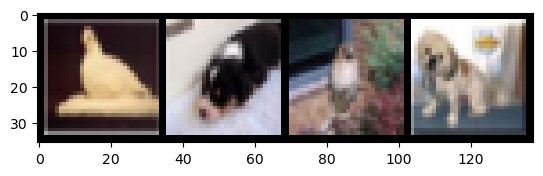

In [39]:
imshow(torchvision.utils.make_grid(images))

In [40]:
net = net.to('cpu')

In [41]:
out = net(images)
print(out.shape)

torch.Size([4, 10])


In [42]:
out = net.cnn_model[0](images)
out.shape

torch.Size([4, 6, 28, 28])

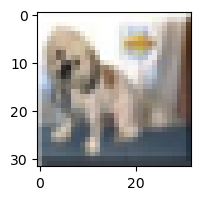

In [43]:
image_id = 3
plt.figure(figsize = (2,2))
imshow(images[image_id,])

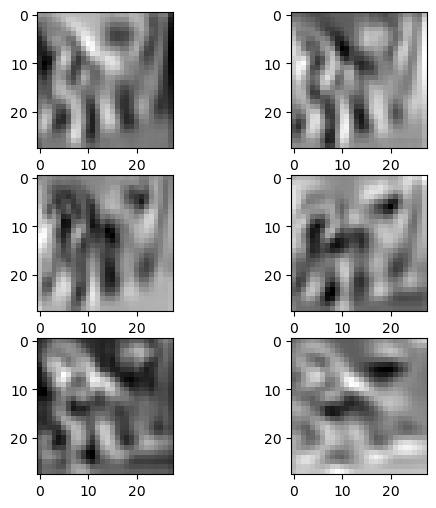

In [44]:
# display the different kernel images. interpretation of how CNN layers. 

plt.figure(figsize = (6,6))
plt.subplot(321)
for i in range(6):
    ax1 = plt.subplot(3, 2, i+1)
    plt.imshow(out[image_id, i, :, :].detach().numpy(), cmap="binary")
plt.show()

# **** END ****